# **Cavity Flow - Lattice Boltzman Method**
***

### **1. Introduction**

## **Python Implementation**
***

### **1. Importing libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

### **2. Defining parameters**

In [2]:
#Matrix
L = 100
U = np.zeros((2,L,L), dtype=float)
V = np.zeros((2,L,L), dtype=float)
R = np.zeros((2,L,L), dtype=float)

F = np.zeros((L,L), dtype=int)

ex = np.array([0, 1, 0, -1, 0, 1, -1, -1, 1])
ey = np.array([0, 0, 1, 0, -1, 1, 1, -1, -1])
inv = np.array([0, 3, 4, 1, 2, 7, 8, 5, 6])
w = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])

uo = 0.5

### **3. Initialize the array**

In [3]:
def init():
	for i in range(L):
		for j in range(L):
			U[0][i][j] = V[0][i][j] = 0
			U[1][i][j] = V[1][i][j] = 0
			R[0][i][j] = R[1][i][j] = 1
			F[i][j] = 0
			
			if j == 0 or i == 0 or i == L-1:
				F[i][j] = 1
			
			if j == L-1:
				U[0][i][j] = U[1][i][j] = uo

### **4. Lattice Boltzman Method Implementation**

In [4]:
def LBM(c):
	r, u, v, f = 0, 0, 0, 0
	for i in range(L):
		for j in range(L-1):
			if F[i][j] == 0:
				U[c][i][j] = V[c][i][j] = R[c][i][j] = 0
				for k in range(9):
					ip = i + ex[k]
					jp = j + ey[k]
					ik = inv[k]
					if F[ip][jp] == 0:
						r = R[1-c][ip][jp]
						u = U[1-c][ip][jp]/r
						v = V[1-c][ip][jp]/r
						f = w[ik]*r*(1-(3/2)*(u*u + v*v)+3*(ex[ik]*u+ey[ik]*v)+(9/2)*(ex[ik]*u+ey[ik]*v)*(ex[ik]*u + ey[ik]*v))
					else:
						f = w[ik]*R[1-c][i][j]
						
					R[c][i][j] += f
					U[c][i][j] += ex[ik]*f
					V[c][i][j] += ey[ik]*f

### **5. Data Visualization**

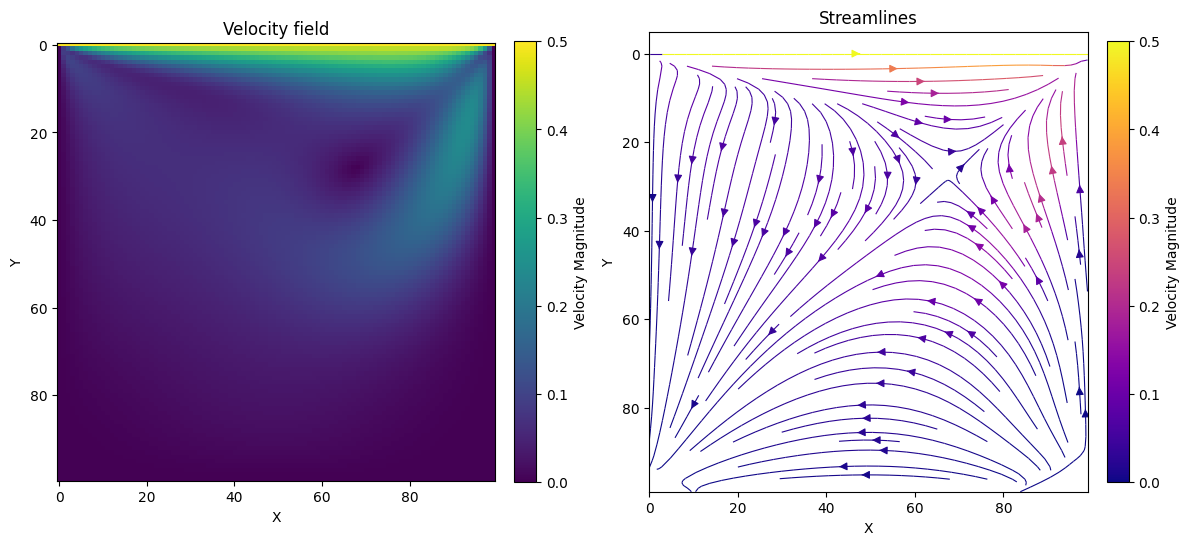

In [6]:
init()

Nsteps = 1001
for frame in range(Nsteps):
    c = frame % 2
    LBM(c)

c_final = (Nsteps - 1) % 2
speed = np.sqrt(U[c_final]**2 + V[c_final]**2)   # Velocity magnitude
speed_r = np.rot90(speed)

Uplot = U[c_final].copy()
Vplot = V[c_final].copy()
Uplot[F == 1] = 0.0
Vplot[F == 1] = 0.0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Velocity field
im = ax1.imshow(speed_r, cmap='viridis', interpolation='none')
cbar1 = plt.colorbar(im, ax=ax1, fraction=0.046, pad=0.04)
cbar1.set_label('Velocity Magnitude')
ax1.set_title('Velocity field')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_aspect('equal')

# Streamlines
X, Y = np.meshgrid(np.arange(L), np.arange(L))
speed1 = np.sqrt(Uplot**2 + Vplot**2)  # velocity magnitude
speed1_r = np.rot90(speed1)

strm = ax2.streamplot(X, Y, np.rot90(Uplot), np.rot90(Vplot),
                      color=speed1_r,           
                      cmap='plasma',         # Color map
                      density=1.2,
                      linewidth=0.8,
                      arrowsize=1.2)

ax2.set_title('Streamlines')
ax2.set_xlabel('X'); ax2.set_ylabel('Y')
ax2.set_aspect('equal')
ax2.invert_yaxis()

# Barra de color
cbar2 = fig.colorbar(strm.lines, ax=ax2, fraction=0.046, pad=0.04)
cbar2.set_label('Velocity Magnitude')

plt.tight_layout()
plt.show()

### **Reference**
[1] Matyka, M., & Dzikowski, M. (2021). Memory-efficient Lattice Boltzmann Method for low Reynolds number flows. Computer Physics Communications, 267, 108044. https://doi.org/10.1016/j.cpc.2021.108044